<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Андан на экономе: домашнее задание 4
</center>


> Если орел, я выиграла. Если решка, ты проиграл.

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **[Рейчел из Друзей](https://www.youtube.com/watch?v=TV9ghItJ2Ms)**

**ФИО:** Гаврин Глеб Юрьевич

## Общая информация

__Дата выдачи:__ 20.05.2024

__Дедлайн:__ 23:59MSK 10.06.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [5]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

## Часть 1: обязательная 

За эту часть можно получить 100 баллов.

### Задача №1: Лучше найди себе девушку! (15 баллов)

In [32]:
#from IPython.display import YouTubeVideo
#YouTubeVideo('ZQ0-anIcnzg', width=400, height=320)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [11]:
df = pd.read_csv('dating_is_hard.csv')

__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

In [15]:
df.head()

,Unnamed: 0,age,is_heavy_drinker,height,sex,smokes,location,offspring
0,uid_1,27,False,64,f,True,san francisco california,no opinion
1,uid_2,38,False,65,f,False,oakland california,wants kids
2,uid_3,31,False,70,m,True,san francisco california,does not have kids
3,uid_4,29,False,66,m,False,martinez california,does not have kids
4,uid_5,30,False,69,m,True,san francisco california,no opinion


In [17]:
df['sex'].value_counts()

sex
m    600
f    400
Name: count, dtype: int64

Средний рост мужчин в США = 69,74 дюймов\
Средний рост женщин в США = 63,5 дюйма

Источники данных о среднем росте:\
Для мужчин - https://www.verywellfit.com/average-height-for-a-man-statistics-2632137 

Для женщин - https://translated.turbopages.org/proxy_u/en-ru.ru.98b93efe-68add890-31c7e808-74722d776562/https/www.verywellfit.com/average-height-for-a-woman-statistics-2632136

Я хочу использовать одновыборочный t-test, но он требует нормальности. **Проверим нормальность распределения роста для мужчини и женщин** с помощью визуального анализа и теста Шапиро-Уилка:

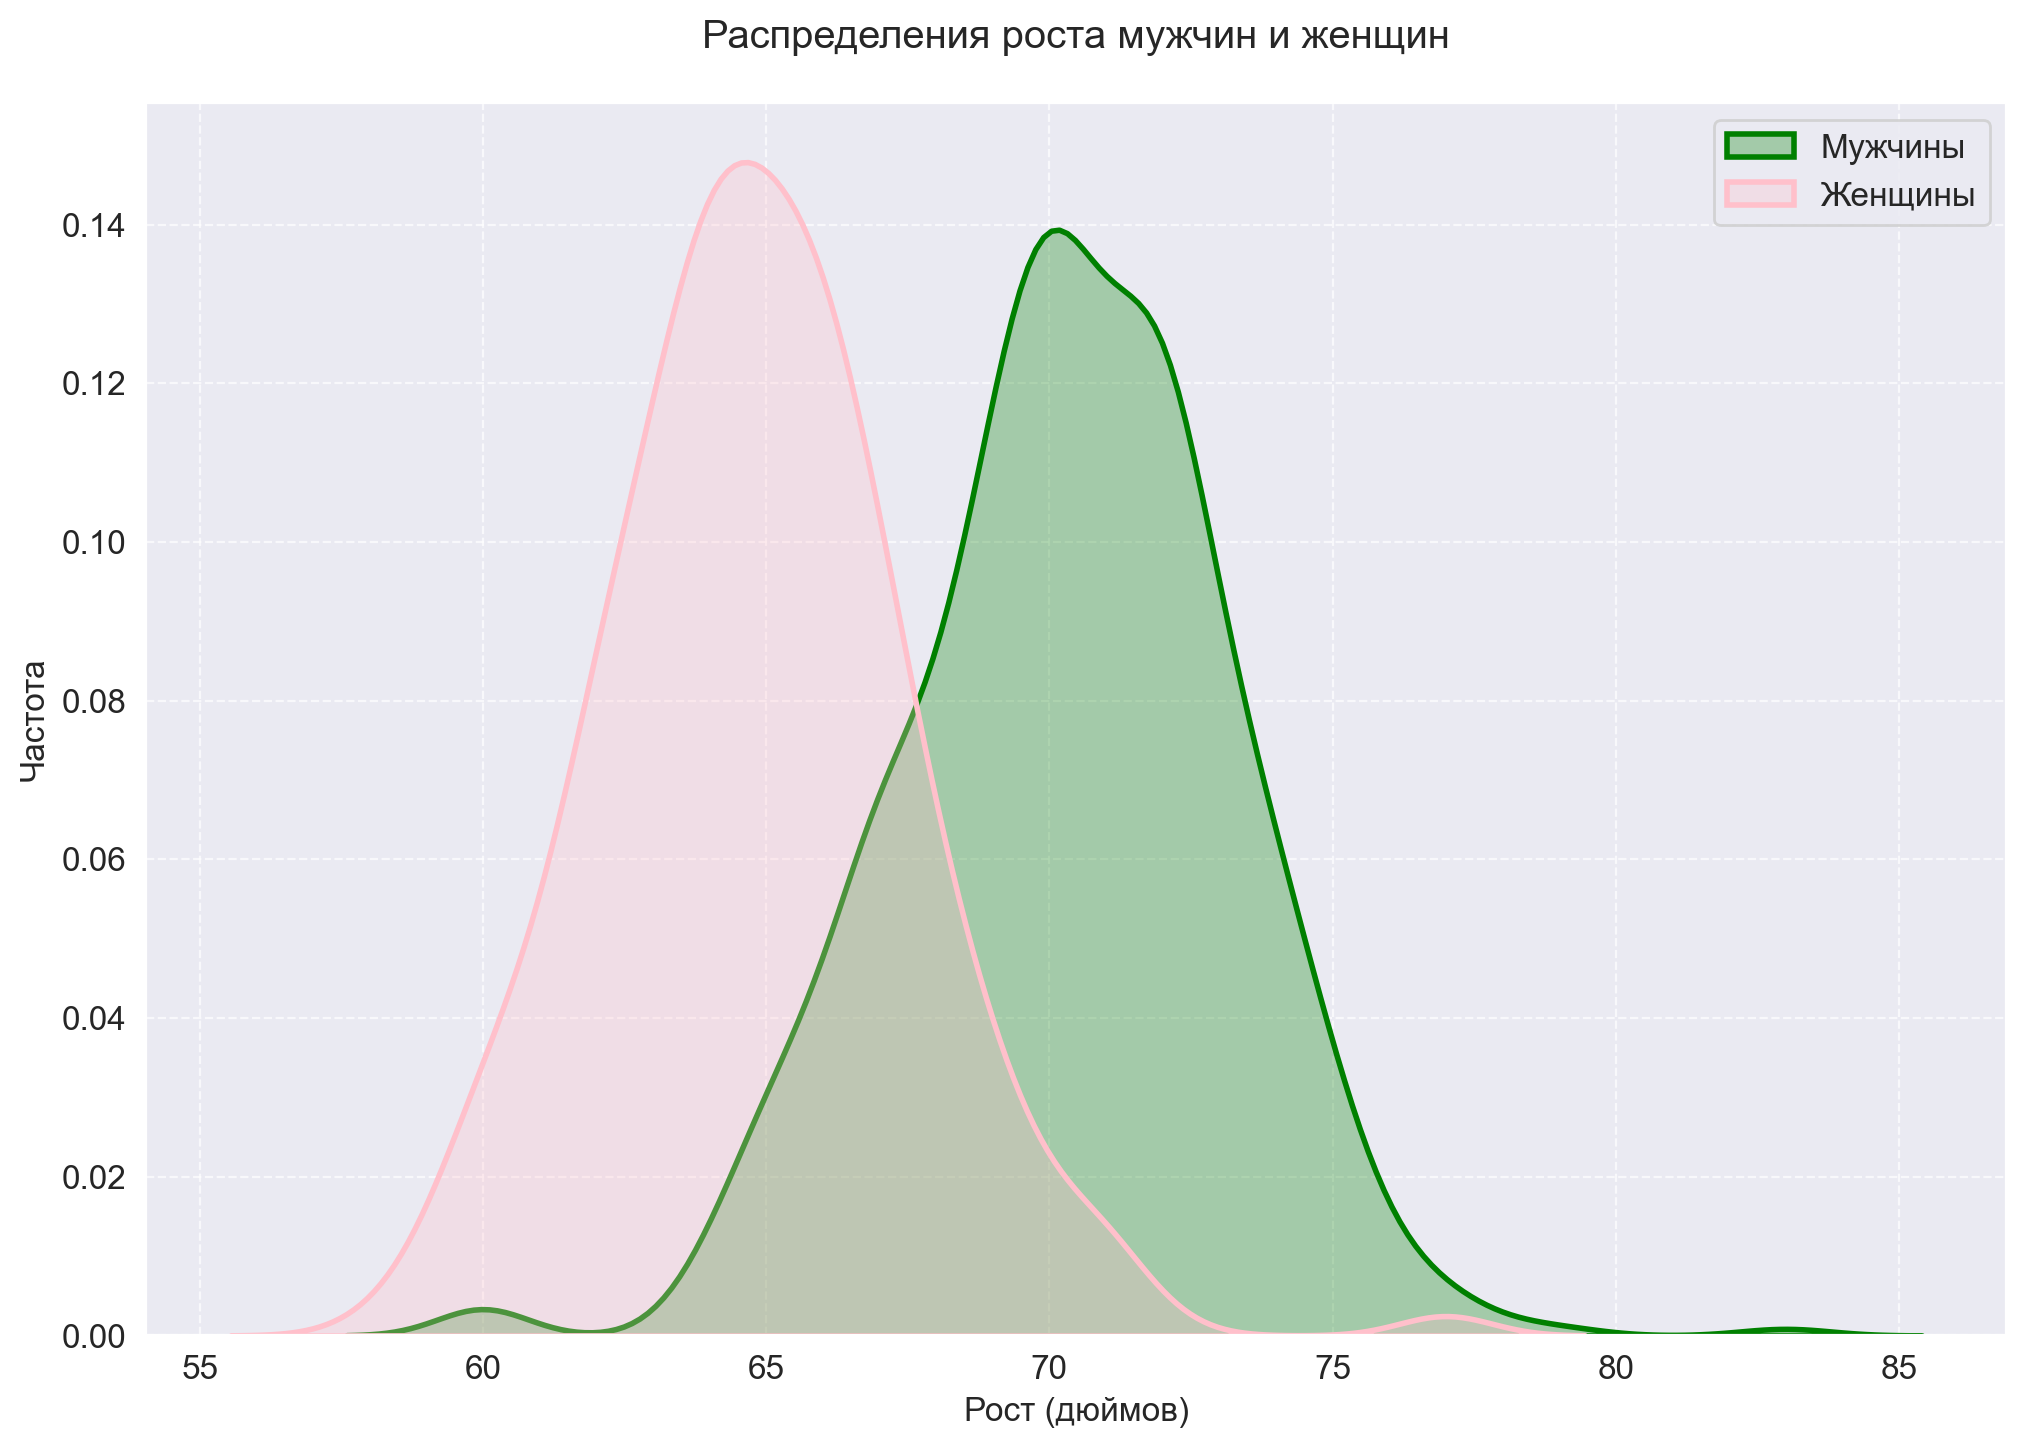

In [34]:
data_male = df[df['sex'] == 'm']['height']  
data_female = df[df['sex'] == 'f']['height']  

plt.figure(figsize=(12, 8), dpi=100)
sns.kdeplot(
    data=data_male,
    color="green",
    label="Мужчины",
    linewidth=2,
    fill=True,  
    alpha=0.3,  
)

sns.kdeplot(
    data=data_female,
    color="pink",
    label="Женщины",
    linewidth=2,
    fill=True,
    alpha=0.3,
)

plt.title("Распределения роста мужчин и женщин", pad=20)
plt.xlabel("Рост (дюймов)")
plt.ylabel("Частота")
plt.legend(loc="upper right")  
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

Визуально, распределения похожи на нормальные. Проверим формально с помощью теста Шапиро-Уилка:

In [39]:
from scipy import stats

In [43]:
stat_m, p_norm_m = stats.shapiro(df[df['sex'] == 'm']['height'])

stat_f, p_norm_f = stats.shapiro(df[df['sex'] == 'f']['height'])

print(f'p-value в тесте Шапиро-Уилка для мужчин: {round(p_norm_m, 3)}')
print(f'p-value в тесте Шапиро-Уилка для женщин: {round(p_norm_f, 3)}')

p-value в тесте Шапиро-Уилка для мужчин: 0.0
p-value в тесте Шапиро-Уилка для женщин: 0.0


Исходя из теста распределения не нормальные, но данный тест очень чувствителен даже к небольшим отклонениям от нормальности, + выборка большая, + визуальный анализ говорит о том, что распредления очень близки к нормальным.\
Поэтому, я использую одновыборочный t-test

In [53]:
# для мужчин
t_stat_m, p_value_m = stats.ttest_1samp(df[df['sex'] == 'm']['height'], 69.74)
print(f'p-value в одновыборочном t-тесте для мужчин: {round(p_value_m, 3)}, t-статистика: {round(t_stat_m, 3)}')

# для женщин
t_stat_f, p_value_f = stats.ttest_1samp(df[df['sex'] == 'f']['height'], 63.5)
print(f'p-value в одновыборочном t-тесте для женщин: {round(p_value_f, 3)}, t-статистика: {round(t_stat_f, 3)}')

p-value в одновыборочном t-тесте для мужчин: 0.0, t-статистика: 4.793
p-value в одновыборочном t-тесте для женщин: 0.0, t-статистика: 9.848


p-value для обоих групп < 0.05, следовательно, средний рост мужчин в приложении не совпадает с их реальным ростом. Аналогично и для женщин.\
При этом t-stat > 0, следовательно, **в приложении люди завышают свой рост**

__б) [5 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

**Проверим гипотезу с помощью Z-теста:**

In [63]:
from statsmodels.stats.proportion import proportions_ztest

In [75]:
count = [df[(df['sex'] == 'm') & (df['is_heavy_drinker']==True)].shape[0], df[(df['sex'] == 'f') & (df['is_heavy_drinker']==True)].shape[0]]
nobs = [df[df['sex'] == 'm'].shape[0], df[df['sex'] == 'f'].shape[0]]

stat, p_value = proportions_ztest(count, nobs)
print(f'Z-статистика: {stat:.3f}, p-value: {p_value:.3f}')

Z-статистика: 0.423, p-value: 0.672


__Вывод:__ значимых различий между долей женщин-алкоголиков и долей мужчин-алкоголиков нет

__в) [5 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

Здесь тоже подойдет z-тест, только я использую **одностороннюю альтернативную гипотезу** (доля курящих алкоголиков > доля курящих неалкоголиков)

In [82]:
count = [df[(df['smokes'] == True) & (df['is_heavy_drinker']==True)].shape[0], df[(df['smokes'] == True) & (df['is_heavy_drinker']==False)].shape[0]]
nobs = [df[df['is_heavy_drinker'] == True].shape[0], df[df['is_heavy_drinker'] == False].shape[0]]

stat, p_value = proportions_ztest(count, nobs, alternative='larger')
print(f'Z-статистика: {stat:.3f}, p-value: {p_value:.3f}')

Z-статистика: 0.674, p-value: 0.250


**Вывод:** нулевая гипотеза не отвергается => нельзя сказать, что алкоголики курят чаще, чем неалкоголики

### Задача №2: Глаза и волосья (20 баллов)

 <img alt="Dark" src="img4.png" width=300, align = "center">

Учеными уже доказано, что цвет волос и глаз передается наследственно: генетически моно объянить от 61\% до 100\% вариации в этих показателях. В [исследовании](https://www.cambridge.org/core/journals/twin-research-and-human-genetics/article/genetic-overlap-between-hair-and-eye-color/FA37E967F280E4B313B171A326AAFBB3#article) решили определить, какие факторы, помимо гена пигментации (меланина), могут влиять на внешний вид людей. Эксперимент проводился в Нидерландах и данные о нем можно найти в файле dataTask2.csv).

Вам предстоит проанализровать зависимость двух показателей, располагающихся в соответсвующих колонках:

1. Цвет волос (`HairColor`)
- `Blond`
- `Red`
- `Brown`
- `Black`

2. Цвет глаз (`EyeColor`)

- `Brown` 
- `Grey`
- `Green`
- `Green brown`


In [88]:
df = pd.read_csv("data_hair_eye.csv", index_col = "Index")
df.head()

,EyeColor,HairColor
Index,,
0,Brown,Blond
1,Brown,Blond
2,Brown,Blond
3,Brown,Blond
4,Brown,Blond


In [90]:
df.shape

(478914, 2)

**a) [3 балла]**. Вы имеете дело с "длинным" форматом данных, то есть каждой строке соответсвует одно наблюдение, а каждой колонке - отдельынй показатель. Теперь вам предстоит это изменить - перевести данные в формат таблицы сопряженности. Вспомнить ее вы можете из курса матстата, однако дополнительно можно почитать [здесь](https://mathworld.wolfram.com/ContingencyTable.html). Переведите данные в формат `contingency table`.

In [96]:
df = pd.crosstab(df['EyeColor'],
                            df['HairColor'], 
                               margins = False)

In [98]:
df

HairColor,Black,Blond,Brown,Red
EyeColor,,,,
Blue,4428,155040,21970,4595
Brown,11758,37102,31791,1671
Gray,4653,121157,22294,4000
Green brown,4682,35517,16763,1493


**б) [3 балла]**. Далее необходимо проанализировать данные. Выведите самый популярный цвет волос и самый популярный цвет глаз в выборке. Также выведите выборочные вероятностьи встретить эти характеристки в категориях, где они занимают наименьшую долю (в цветах глаз и в цветах волос соответственно). 

Интерпретируйте результаты относительно страны, в которой проводилось исследование. 

In [102]:
df.columns

Index(['Black', 'Blond', 'Brown', 'Red'], dtype='object', name='HairColor')

In [108]:
# Самый популярный цвет волос
hair_color_sums = df.sum(axis=0)  # сумма по столбцам (цветам волос)
most_popular_hair = hair_color_sums.idxmax()
print(f"Самый популярный цвет волос: {most_popular_hair} ({hair_color_sums.max()} человек)")

# Самый популярный цвет глаз
eye_color_sums = df.sum(axis=1)  # сумма по строкам (цветам глаз)
most_popular_eye = eye_color_sums.idxmax()
print(f"Самый популярный цвет глаз: {most_popular_eye} ({eye_color_sums.max()} человек)")

Самый популярный цвет волос: Blond (348816 человек)
Самый популярный цвет глаз: Blue (186033 человек)


**Вывод:** Результат соответствует ожидаемому, так как в североевропейских странах действительно самым распространенным цветом волос является блонд, а глаз - голубой

**в) [3 балла]**. Визуализируйте распределение цветов глаз для каждого цвета волос. Попробуйте воспользоваться функцией [`mosaic()`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html), или же обычными столбчатыми графиками

In [111]:
from statsmodels.graphics.mosaicplot import mosaic

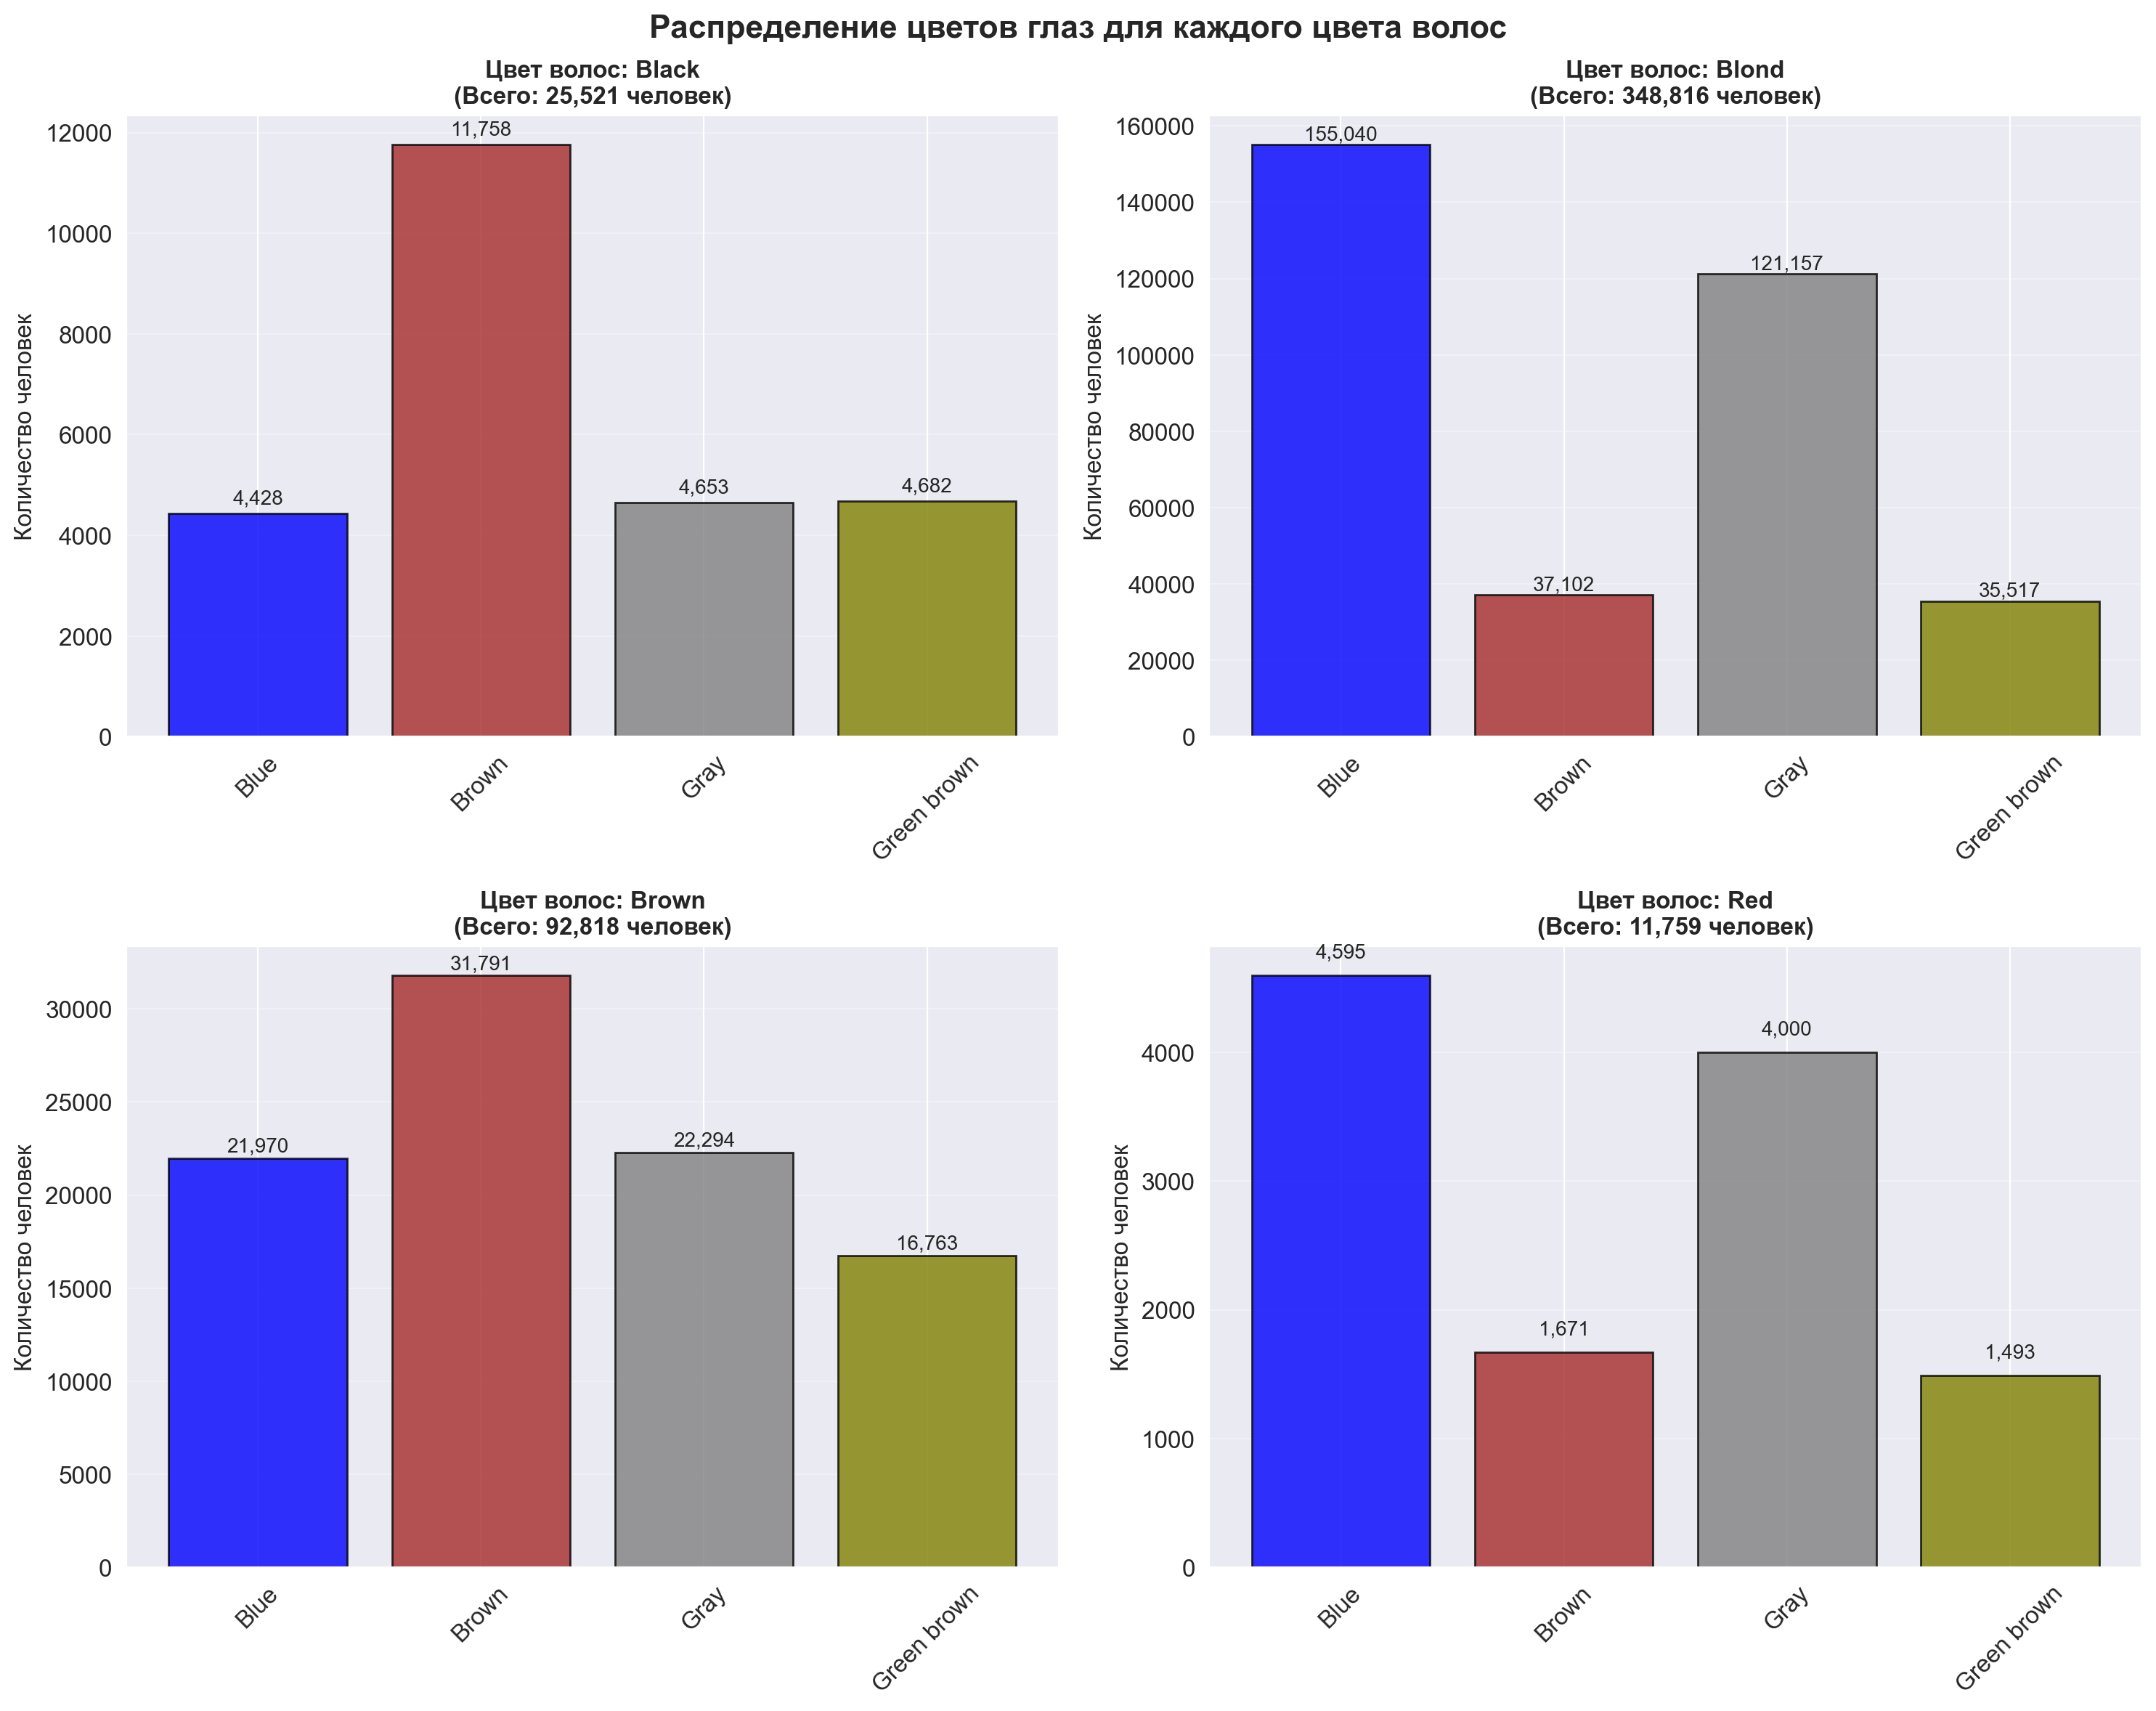

In [127]:
colors = ['Blue', 'Brown', 'Gray', 'Green brown']
hair_colors = ['Black', 'Blond', 'Brown', 'Red']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()  # Преобразуем в плоский массив


eye_colors = ['blue', 'brown', 'gray', 'olive']

for i, (hair_color, counts) in enumerate(df.items()):
    ax = axes[i]
    bars = ax.bar(colors, counts, color=eye_colors, alpha=0.8, edgecolor='black')
    
    ax.set_title(f'Цвет волос: {hair_color}\n(Всего: {sum(counts):,} человек)',
                 fontsize=12, fontweight='bold')
    ax.set_ylabel('Количество человек')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 100,
                f'{height:,}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Распределение цветов глаз для каждого цвета волос', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Вывод:** Распределения значитеьльно отличаются. При этом, что интересно, распределения цветов глаз очень схожи для людей с разными темными волосами (black/brown) и людей с разными светлыми волосами (red/blond)

**г) [5 баллов]**. Рассчитайте суммы по столбцам, строкам, а также общую сумму. Рассчитайте тестовую $\chi^2$ для теста на независимость двух переменных. Определите степени свободы у распределения получившеся статистики, найдите критическое значение $\chi^2_{df}$ с помощью встроенной функции `.ppf()`

**H0**: переменные независимы\
**H1**: переменные не независимы, есть статистически значимая связь между ними

In [146]:
# наблюдаемые частоты
hair_color_sums = df.sum(axis=0)  # сумма по столбцам (цветам волос)
eye_color_sums = df.sum(axis=1)  # сумма по строкам (цветам глаз)
total_sum = df.sum().sum() # сумма всех элементов

# ожидаемые частоты
expected = np.outer(eye_color_sums, hair_color_sums) / total_sum
expected_df = pd.DataFrame(expected, 
                          index=df.index, 
                          columns=df.columns)

chi_sq = ((df - expected_df) ** 2 / expected_df).sum().sum() # тестовая хиквадрат статистика

k = (4-1)*(4-1) #количество степеней свободы = строк-1 * столбцов-1

from scipy.stats import chi2 
critical_chisq = chi2.ppf(1 - 0.05, k) #критическое значение для уровня значимости 5%

In [154]:
if chi_sq > critical_chisq:
    print("Отклоняем H0: цвет волос и цвет глаз не независимы")
    print(f"  ({chi_sq:.3f} > {critical_chisq:.3f})")
else:
    print("Не отклоняем H0: цвет волос и цвет глаз независимы")
    print(f"  ({chi_sq:.3f} ≤ {critical_chisq:.3f})")

Отклоняем H0: цвет волос и цвет глаз не независимы
  (57013.662 > 16.919)


Тестовая статистика намного больше критической. Значит, **распределение цветов глаз действительно различается в зависимости от цвета волос**.

*Можете проверить себя, воспользовавшишь функцией `chi2_contingency()`*

In [166]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df)

print(f'p-value = {round(p, 10)}')

p-value = 0.0


Автоматический тест подтвердил результат. p-value ~=0, поэтому **вероятность, что тест ошибается, и на самом деле связи между переменными нет ничтожно мала**

**д) [3 балла]**. Постройте плотность распределения рассчитанной статистики, а найдите p-value точечной оценки, и обозначьте на графике. Также укажите несколько типичных уровней значимости $\alpha$ и нанесите их на график. Проинтерпретируйте результаты.

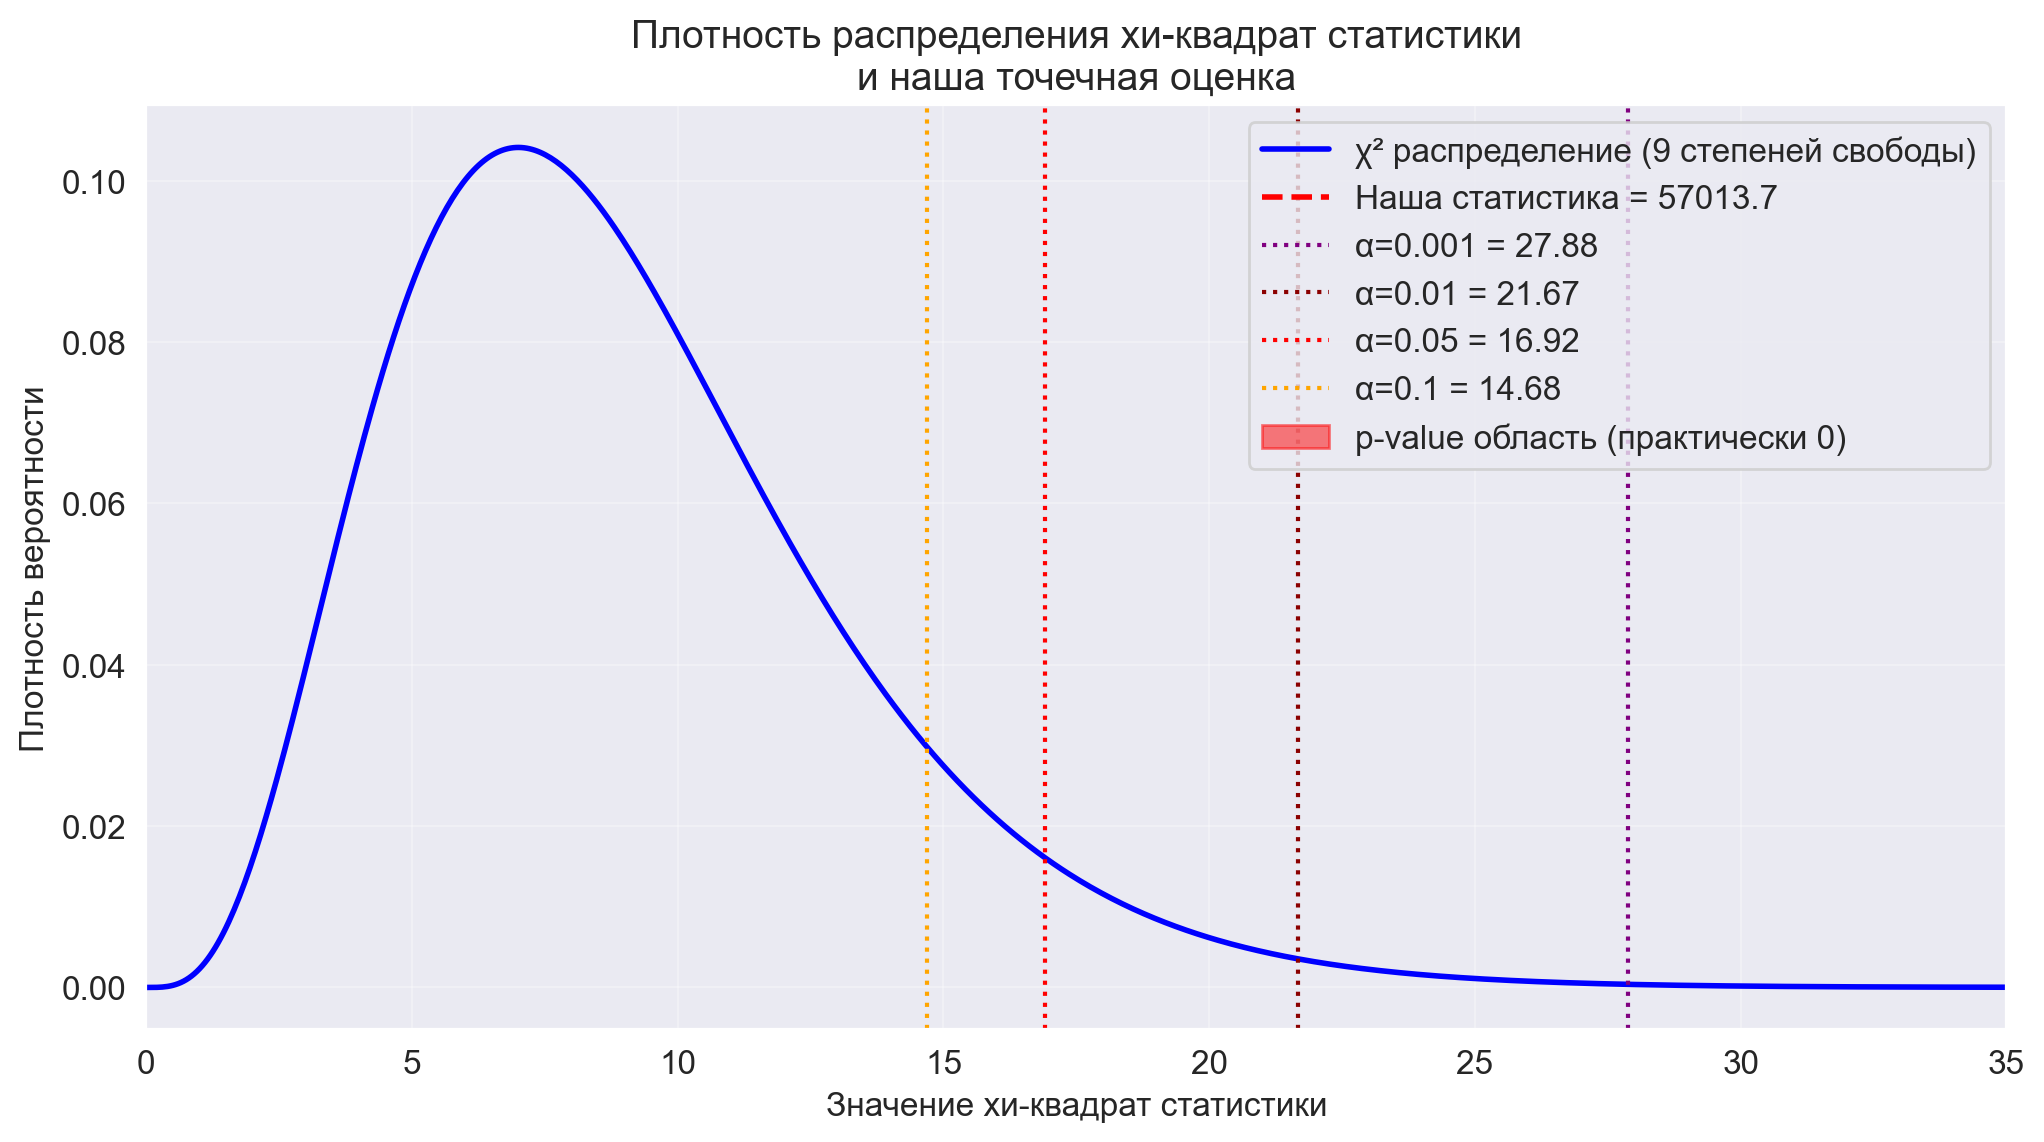

In [176]:
x = np.linspace(0, 50, 1000)  #диапазон для хи-квадрат
pdf = chi2.pdf(x, k)  # плотность распределения

plt.figure(figsize=(12, 6))
plt.plot(x, pdf, 'b-', linewidth=2, label=f'χ² распределение ({k} степеней свободы)')

plt.axvline(chi_sq, color='red', linestyle='--', linewidth=2, 
            label=f'Наша статистика = {chi_sq:.1f}')


alphas = [0.001, 0.01, 0.05, 0.10]
colors = ['purple', 'darkred', 'red', 'orange']

for alpha, color in zip(alphas, colors):
    crit_value = chi2.ppf(1 - alpha, k)
    plt.axvline(crit_value, color=color, linestyle=':', 
                label=f'α={alpha} = {crit_value:.2f}')


x_fill = np.linspace(chi_sq, chi_sq + 10, 100)  # маленький отрезок
plt.fill_between(x_fill, chi2.pdf(x_fill, k), color='red', alpha=0.5, 
                 label=f'p-value область (практически 0)')

plt.title('Плотность распределения хи-квадрат статистики\nи наша точечная оценка', fontsize=14)
plt.xlabel('Значение хи-квадрат статистики')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(0, 35)
plt.show()

**Вывод**: p-value точечной оценки очень мал, оценку даже не видно на графике. Соответственно, **для всех разумных уровней значимости нулевая гипотеза отвергается**

**е) [3 балла]**. Сделайте финальные выводы и при необходимости дополнительные расчеты, на которых они будут основываться. Есть ли стастистическая взаимосвязь между переменными. И если есть, то чем она может быть объяснена?

Для определения силы связи я решил рассчитать **критерий Крамера**, о нем я прочитал здесь: https://www.geeksforgeeks.org/python/how-to-calculate-cramers-v-in-python/

In [193]:
df

HairColor,Black,Blond,Brown,Red
EyeColor,,,,
Blue,4428,155040,21970,4595
Brown,11758,37102,31791,1671
Gray,4653,121157,22294,4000
Green brown,4682,35517,16763,1493


In [190]:
X2 = chi2_contingency(df, correction=False)[0]
N = df.sum().sum()  # наблюдений
r, c = df.shape # размеры таблицы

# Критерий Крамера
cramers_v = np.sqrt(X2 / (N * min(r-1, c-1)))
print(f'Критерий Крамера: {round(cramers_v, 5)}')

Критерий Крамера: 0.1992


**Вывод**: Значение критерия Крамера < 0.3 => **связь слабая**.\
Это логично, так как на цвет влияет множество других факторов, различные механизмы наследования.
**Статистическая взаимосвязь между переменными точно есть (главное подтверждение - ничтожно малое p-value)**. Она может быть объяснена **генетическими механизмами, популяционно-генетическими факторами (североевропейский гаплотип), биохимическими процессами**

### Задача №3. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Ваш ответ:**

Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [196]:
df = pd.read_csv("ab_simpson.csv")
df.head()

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test


In [198]:
df.shape

(401807, 9)

In [222]:
df.columns

Index(['Unnamed: 0', 'user_id', 'sex', 'datetime', 'district', 'hotel_page',
       'payment_page', 'payment', 'group'],
      dtype='object')

In [224]:
df.drop('Unnamed: 0', inplace=True, axis=1)

**б) [3 балла]** Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.


In [231]:
df.dtypes

user_id          int64
sex              int64
datetime        object
district        object
hotel_page       int64
payment_page     int64
payment          int64
group           object
dtype: object

In [203]:
df['user_id'].nunique()
# некоторые пользователи посещали сайт несколько ра

401693

C:\Users\User\AppData\Local\Temp\ipykernel_9392\2193030771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


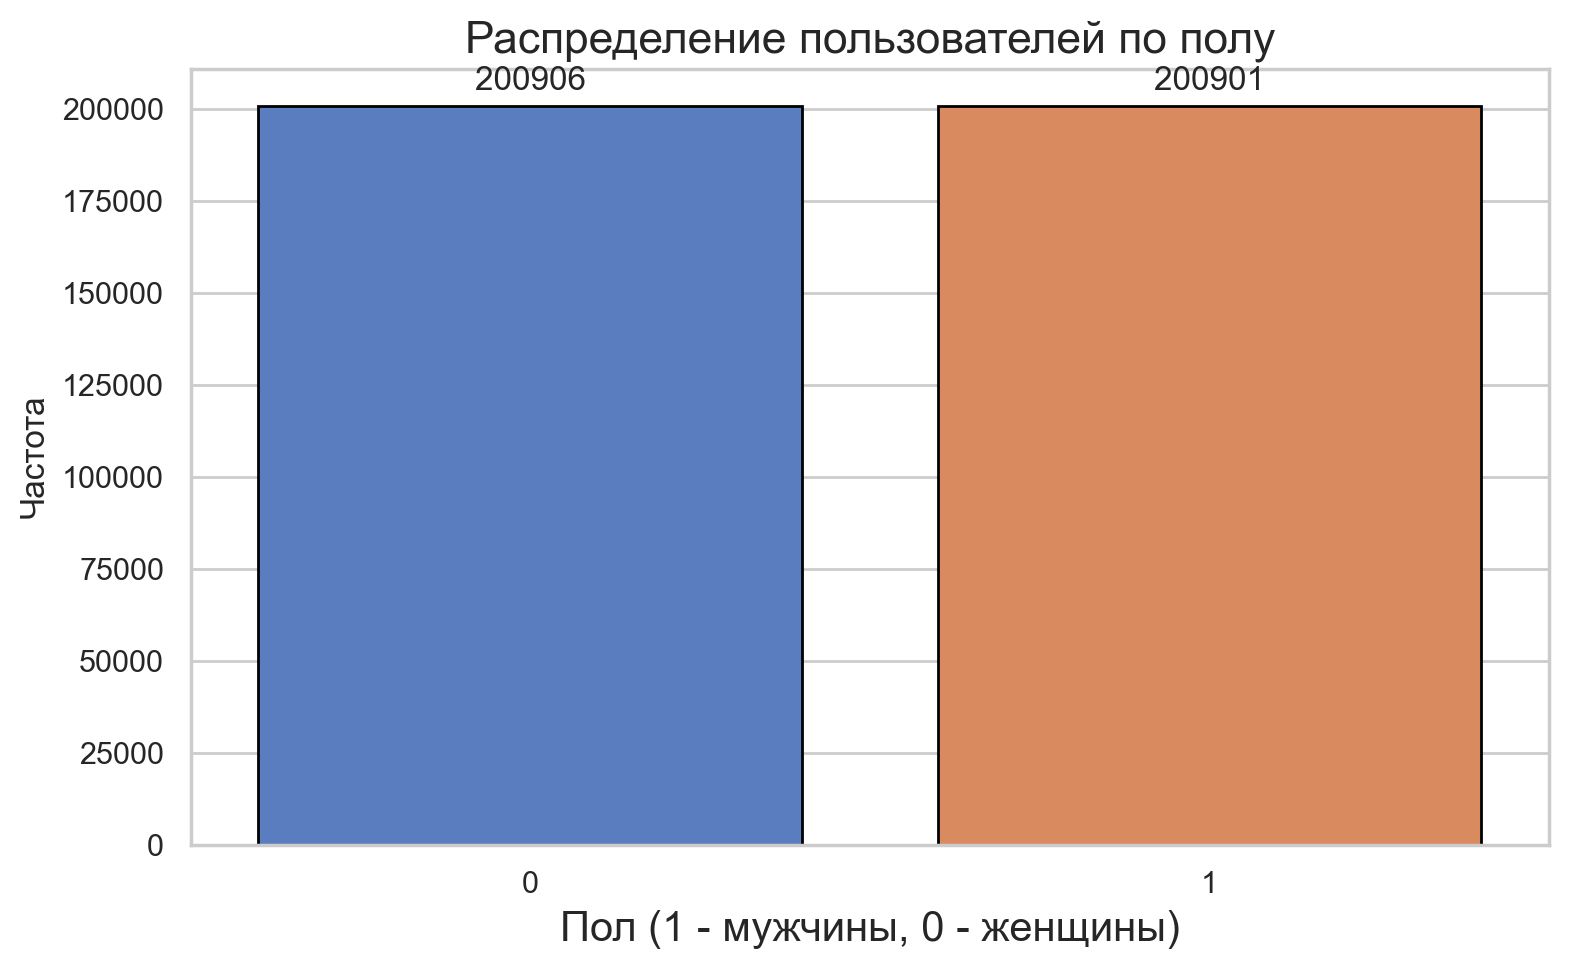

In [208]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

ax = sns.countplot(
    data=df,
    x='sex',
    palette='muted', 
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Распределение пользователей по полу', fontsize=16)
plt.xlabel('Пол (1 - мужчины, 0 - женщины)', fontsize=15)
plt.ylabel('Частота', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

Посмотрим, равномерно ли разбиты пользователи на тестовую и контрольную группы:

In [215]:
df['group'].value_counts(normalize=True)

group
test       0.502567
control    0.497433
Name: proportion, dtype: float64

Да, **тестовая и контрольная группа идентичны по размеру**. Теперь посмотрим детальнее на другие признаки:

In [228]:
df.describe()

,user_id,sex,hotel_page,payment_page,payment
count,4.018070e+05,401807.000000,401807.0,401807.000000,401807.000000
mean,4.615212e+18,0.499994,1.0,0.741824,0.292242
std,2.662886e+18,0.500001,0.0,0.437632,0.454794
min,5.888584e+13,0.000000,1.0,0.000000,0.000000
25%,2.309885e+18,0.000000,1.0,0.000000,0.000000
50%,4.610460e+18,0.000000,1.0,1.000000,0.000000
75%,6.923790e+18,1.000000,1.0,1.000000,1.000000
max,9.223335e+18,1.000000,1.0,1.000000,1.000000


In [233]:
df['district'].value_counts()

district
Южный федеральный округ              120749
Центральный федеральный округ        120336
Приволжский федеральный округ         60333
Северо-Западный федеральный округ     50071
Уральский федеральный округ           26189
Сибирский федеральный округ           16072
Дальневосточный федеральный округ      8057
Name: count, dtype: int64

In [238]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date

C:\Users\User\AppData\Local\Temp\ipykernel_9392\3608036409.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])


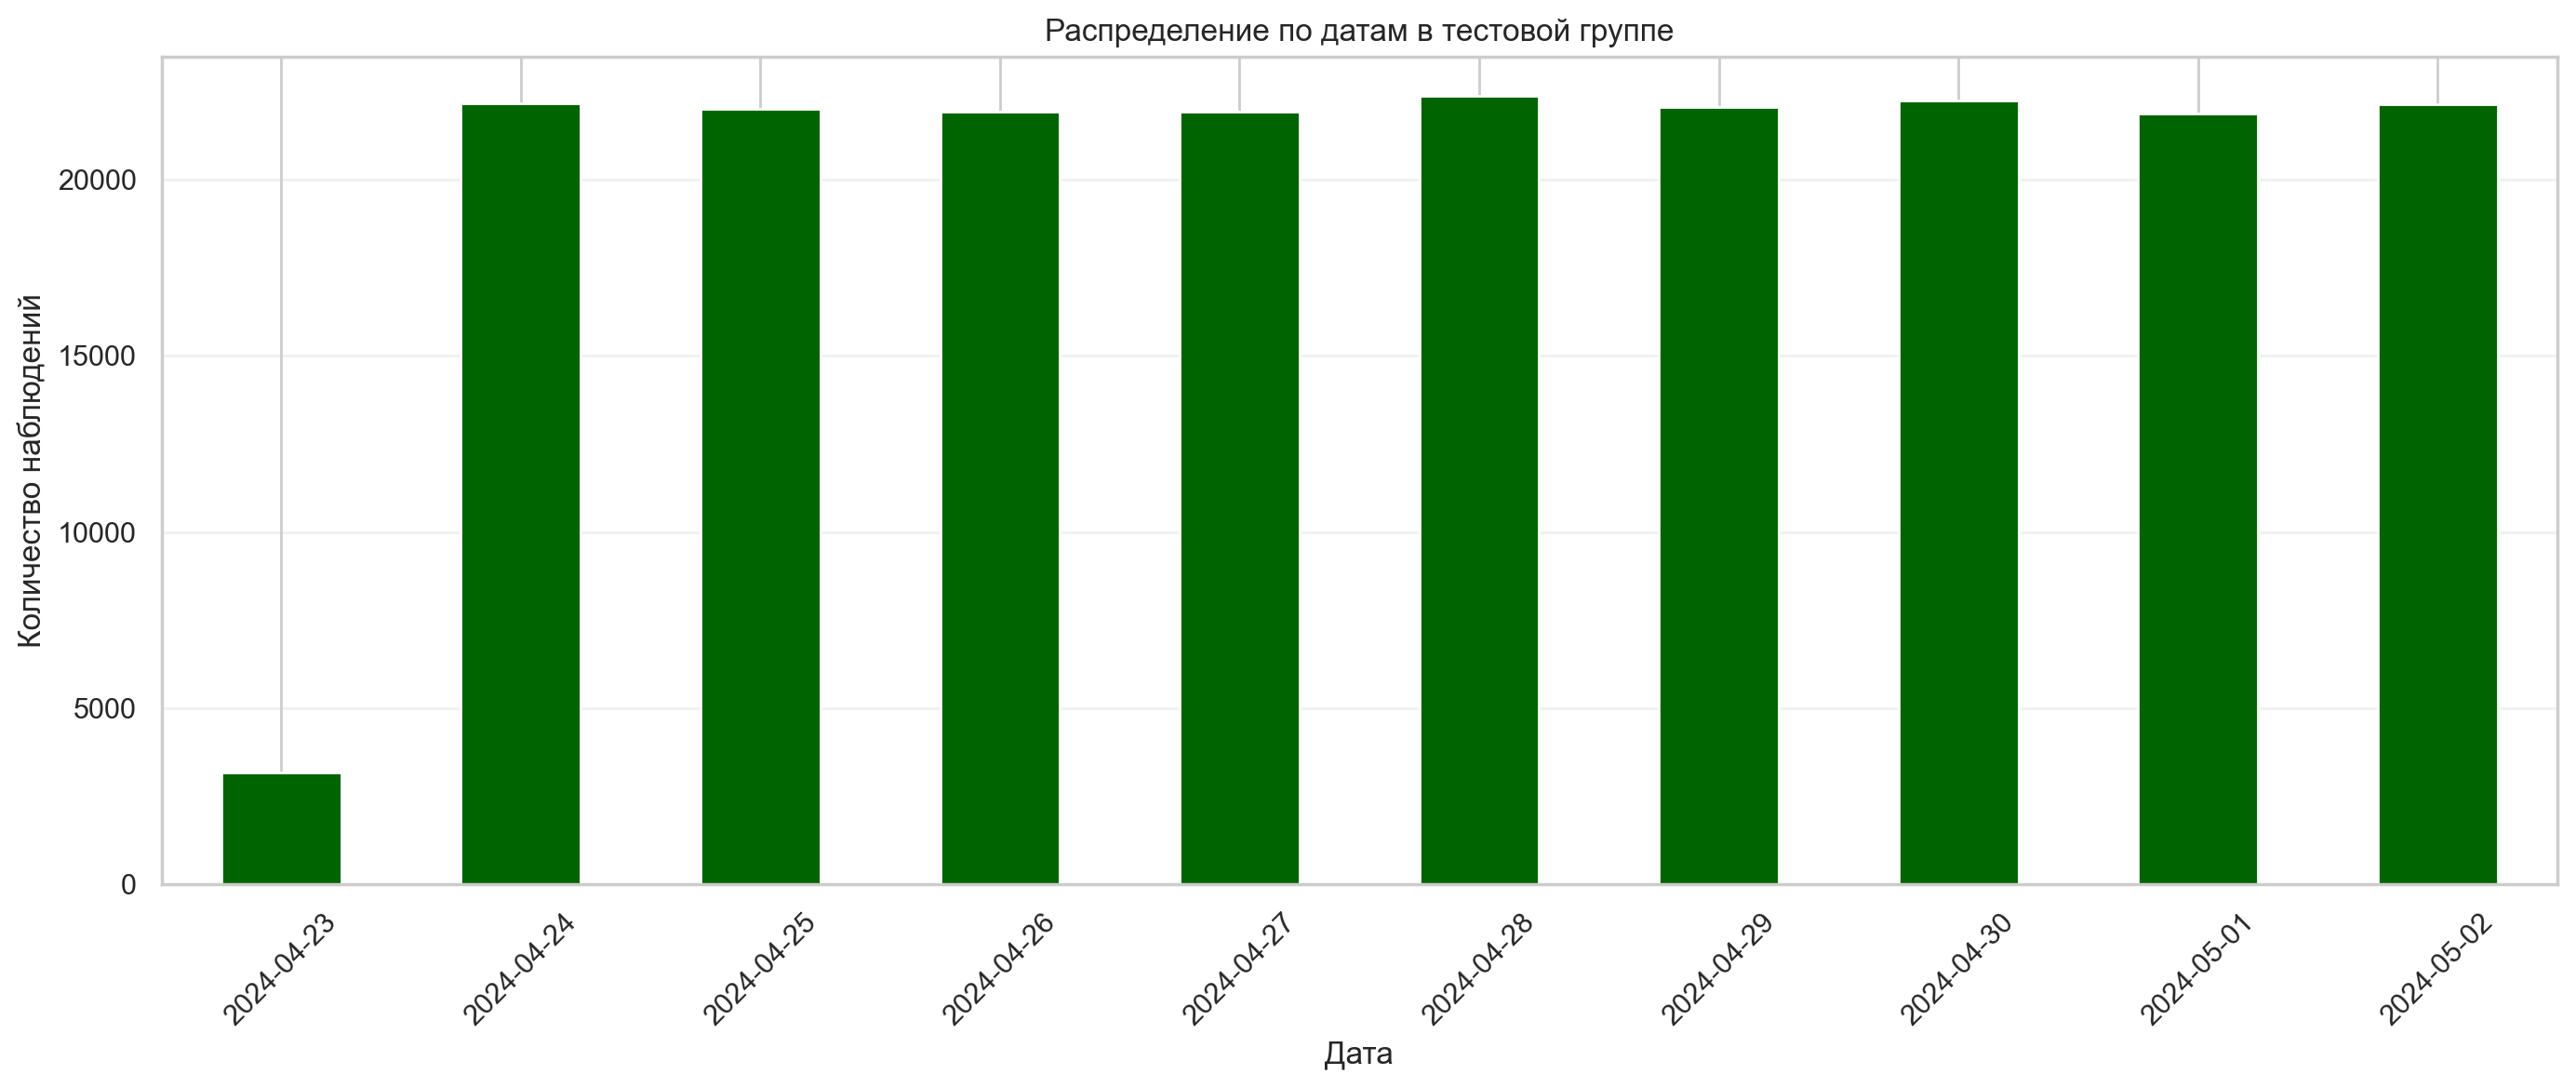

In [246]:
plt.figure(figsize=(14, 6))
df[df['group']=='test']['date'].value_counts().sort_index().plot(kind='bar', color='darkgreen')
plt.title('Распределение по датам в тестовой группе')
plt.xlabel('Дата')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

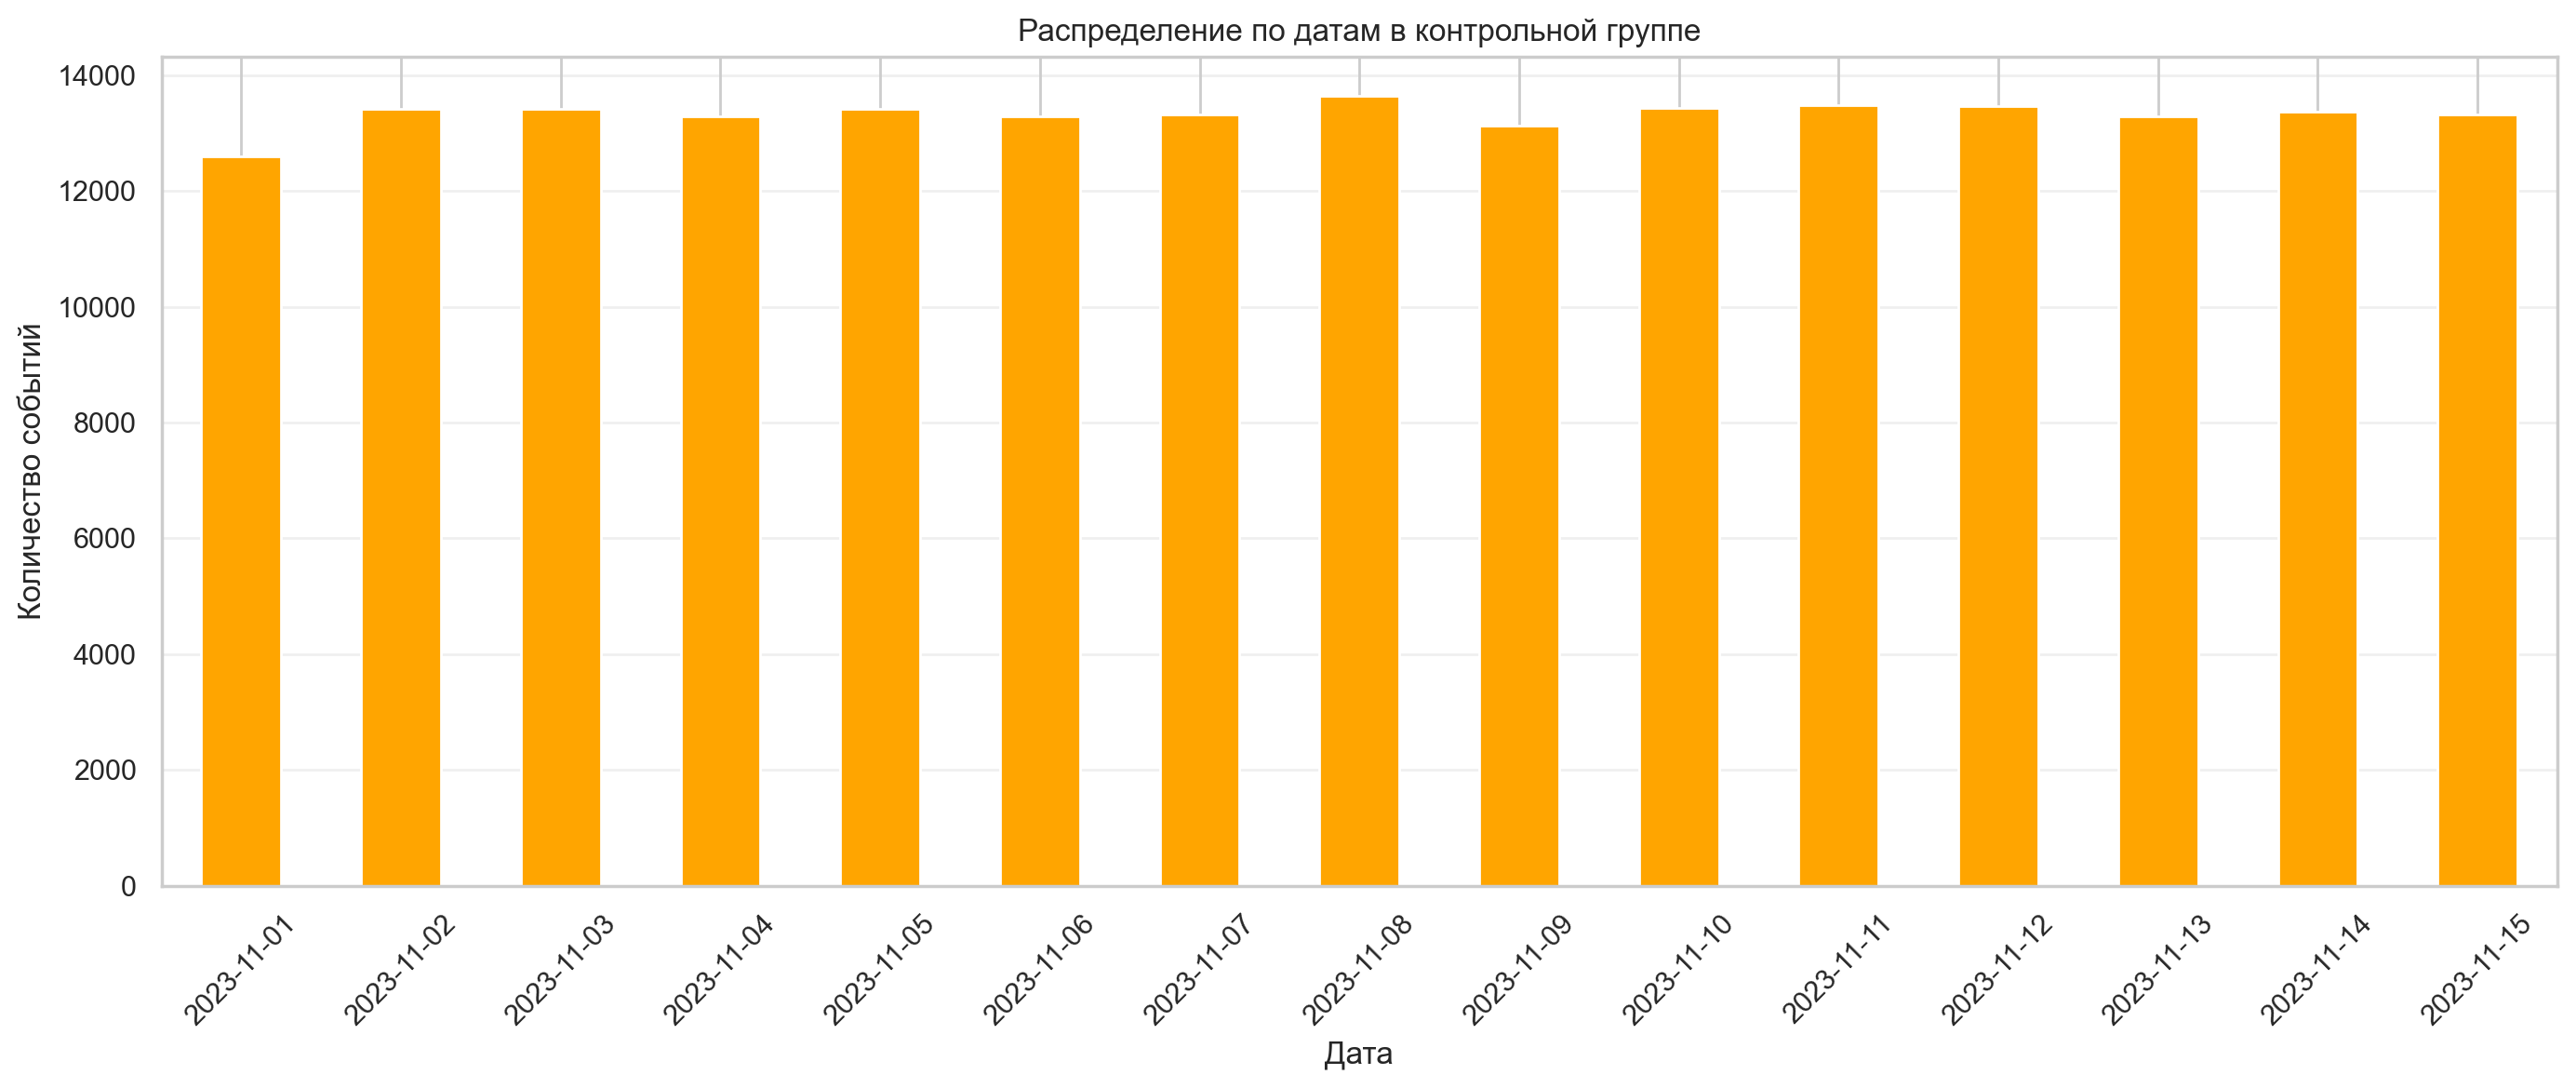

In [248]:
plt.figure(figsize=(14, 6))
df[df['group']=='control']['date'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Распределение по датам в контрольной группе')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Для тестовой группы взяты наблюдения за 2024 год, а для контрольной за 2023. Это неправильно и противоречит теории АБ тестов. Нужно брать **параллельно наблюдения для тестовой и контрольной групп**

In [254]:
print("Распределение регионов в группах")
pd.crosstab(df['district'], df['group'], normalize='columns').round(2)

Распределение регионов в группах


group,control,test
district,,
Дальневосточный федеральный округ,0.01,0.03
Приволжский федеральный округ,0.12,0.18
Северо-Западный федеральный округ,0.20,0.05
Сибирский федеральный округ,0.04,0.04
Уральский федеральный округ,0.03,0.10
Центральный федеральный округ,0.40,0.20
Южный федеральный округ,0.20,0.40


Распределения не одинаковые между контролем и тестом, что ожидаемо из-за **временного лага**.\
Например, в Южном округе отдыхающих в апреле-мае существенно больше, чем в ноябре.\
**АБ тест проводился некорректно**, так как нарушен принцип случайного распределения, который лежит в основе теории АБ тестироавния

Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

In [271]:
regs = df.groupby('district').agg(users=('user_id', 'count'),
    payment_page=('payment_page', 'sum'),
    payment=('payment', 'sum'))

regs['CR_payment_page'] = round(regs['payment_page'] / regs['users'],2)
regs['CR_payment'] = round(regs['payment'] / regs['users'],2)

regs[['CR_payment_page','CR_payment']]

,CR_payment_page,CR_payment
district,,
Дальневосточный федеральный округ,0.18,0.31
Приволжский федеральный округ,0.63,0.30
Северо-Западный федеральный округ,0.70,0.27
Сибирский федеральный округ,0.31,0.29
Уральский федеральный округ,0.44,0.31
Центральный федеральный округ,0.91,0.28
Южный федеральный округ,0.81,0.31


In [276]:
df[(df['payment_page']==0) &(df['payment']==1)].shape

(30468, 9)

Меня удивляет наличие кейсов, когда **пользователь не был на странице оплаты, но оплатил**\
В целом, **конверсия в страницу оплаты очень разнится по регионам**. ЦФО и ЮФО - лидеры, при этом они в несколько раз опережают некоторые регионы\
При этом конверсия в оплату почти не отличается у разных регионов

In [300]:
reg_gr_CR = df.groupby(['district', 'group']).agg(
    users=('user_id', 'count'),
    payment_page=('payment_page', 'sum'),
    payment=('payment', 'sum')
).reset_index()

reg_gr_CR['CR_payment_page'] = reg_gr_CR['payment_page'] / reg_gr_CR['users']
reg_gr_CR['CR_payment'] = reg_gr_CR['payment'] / reg_gr_CR['users']

pivot = reg_gr_CR.pivot(index='district', columns='group', values=['CR_payment_page','CR_payment'])
print("\nСравнение конверсий в стр.оплаты и оплату по регионам")
pivot.round(2)


Сравнение конверсий в стр.оплаты и оплату по регионам


CR_payment_page       CR_payment      
group                                     control  test    control  test
district                                                                
Дальневосточный федеральный округ             0.1  0.20       0.23  0.33
Приволжский федеральный округ                 0.6  0.65       0.25  0.33
Северо-Западный федеральный округ             0.7  0.72       0.25  0.33
Сибирский федеральный округ                   0.3  0.32       0.25  0.33
Уральский федеральный округ                   0.4  0.45       0.24  0.33
Центральный федеральный округ                 0.9  0.93       0.25  0.33
Южный федеральный округ                       0.8  0.81       0.25  0.34

Заметим, что **в разбивке по регионам конверсия в страницу оплаты выросла в тесте по сравнению с контролем, как и конверсия в оплату**

__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

In [286]:
df

,user_id,sex,datetime,district,hotel_page,payment_page,payment,group,date
0,3326449108867616315,1,2023-11-15 00:02:00,Южный федеральный округ,1,1,0,control,2023-11-15
1,7887645543455909870,1,2023-11-02 21:12:00,Центральный федеральный округ,1,1,0,control,2023-11-02
2,6148146969124793824,1,2023-11-10 10:06:00,Центральный федеральный округ,1,1,1,control,2023-11-10
3,2721602951940155275,0,2023-11-12 19:10:00,Центральный федеральный округ,1,1,0,control,2023-11-12
4,1829030712785972138,0,2024-05-01 05:19:00,Южный федеральный округ,1,0,0,test,2024-05-01
...,...,...,...,...,...,...,...,...,...
401802,1998190998209076143,1,2023-11-01 18:38:00,Сибирский федеральный округ,1,0,0,control,2023-11-01
401803,1246632709977091801,0,2024-04-29 04:02:00,Приволжский федеральный округ,1,1,0,test,2024-04-29
401804,3689258679250689626,0,2023-11-06 20:55:00,Центральный федеральный округ,1,1,1,control,2023-11-06
401805,7863032986390660588,0,2023-11-05 22:48:00,Приволжский федеральный округ,1,0,0,control,2023-11-05


In [290]:
gr = df.groupby('group').agg(users=('user_id', 'count'),
    payment_page=('payment_page', 'sum'),
    payment=('payment', 'sum'))

gr['CR_payment_page'] = round(gr['payment_page'] / gr['users'],2)
gr['CR_payment'] = round(gr['payment'] / gr['users'],2)

gr[['users', 'CR_payment_page', 'CR_payment']]

,users,CR_payment_page,CR_payment
group,,,
control,199872,0.76,0.25
test,201935,0.73,0.33


Воронка в тестовой группе улучшилась с точки зрения перехода к оплате, но ухудшилась с точки зрения перехода на страницу оплаты.\
Насколько я понял, в данной задаче целевой метрикой являлась конверсия в страницу оплаты, поэтому **эффект скорее отрицательный**

__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

In [297]:
x = pd.crosstab(df['district'], df['group'], normalize='columns')
x['diff'] = x['test'] - x['control']
x.round(2)

group,control,test,diff
district,,,
Дальневосточный федеральный округ,0.01,0.03,0.02
Приволжский федеральный округ,0.12,0.18,0.06
Северо-Западный федеральный округ,0.20,0.05,-0.15
Сибирский федеральный округ,0.04,0.04,0.00
Уральский федеральный округ,0.03,0.10,0.07
Центральный федеральный округ,0.40,0.20,-0.20
Южный федеральный округ,0.20,0.40,0.20


**Предпочтения пользователей в тесте и контроле совершенно разные**, я связываю это с временным лагом между группами

Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'> 

__е) [4 балла]__ Теперь, когда вы все узнали, опишите кратко почему вы получили противоречивый результат в пунктах 3 и 4 (1 балл)

**Ваш ответ:** противоречивый результат состоит в том, что конверсия в страницу оплаты растет в разбивке по регионам, но падает, если рассматривать суммарно.\
Парадокс Симпсона как раз состоит в том, что в разбивке по группам наблюдается одинаково направленная зависимость, при объединении этих групп направление зависимости меняется на противоположное.\
Происходит из-за того, что был лаг времени между группами и сменилось распределение интересов пользователей в регионах отдыха (весна vs ноябрь)\
Хоть конверсия в регионах улучшилась, но произошло смещение выборки в сторону регионов с меньшей конверсией в переход на стр. оплаты, поэтому общая конверсия в тесте стала меньше.\
было 40% ЦФО, 20% ЮФО, 20% СЗФО, 12% ПФО, ...\
стало 40% ЮФО, 20% ЦФО, 18% ПФО, 5% СЗФО, ...\
конверсия в стр. оплаты: ЦФО > ЮФО > СЗФО > ПФО...\
выборка сместилась в сторону регионов с более низкой, в целом, конверсией в переход на стр. оплаты